**CNN MODEL**

In [ ]:
!pip install keras tensorflow pandas numpy matplotlib seaborn scikit-learn


                                                Text         labels
0           Screenshot edukkan vannth njan മാത്രമാണോ      Sarcastic
1  നമ്മുടെ അനു സിത്താര ചേച്ചി ഇങ്ങനെ വരുന്നത് നോക...      Sarcastic
2             Mollyhood is getting bigger and bigger  Non-sarcastic
3     Ho aaa BGM. Mammookka ithu oru pwoli pwolikkum  Non-sarcastic
4  Enthaale, sambhavam puraanam aanelum backgroun...      Sarcastic
Index(['Text', 'labels'], dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.8076 - loss: 0.4813 - val_accuracy: 0.8474 - val_loss: 0.3842
Epoch 2/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.9051 - loss: 0.2520 - val_accuracy: 0.8322 - val_loss: 0.3869
Epoch 3/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.9652 - loss: 0.1098 - val_accuracy: 0.8360 - val_loss: 0.5714
Epoch 4/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 40s 76ms/step - accuracy: 0.9861 - loss: 0.0494 - val_accuracy: 0.8427 - val_loss: 0.6400
Epoch 5/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.9921 - loss: 0.0265 - val_accuracy: 0.8318 - val_loss: 0.6785
Epoch 6/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9951 - loss: 0.0238 - val_accuracy: 0.8403 - val_loss: 0.8139
Epoch 7/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 40s 77ms/step - accuracy: 0.9953 - loss: 0.0129 - val_accuracy: 0.8318 - val_loss: 0.8935
Epoch 8/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 19s 71ms/step - accuracy: 0.9955 - loss: 0.0146 - 

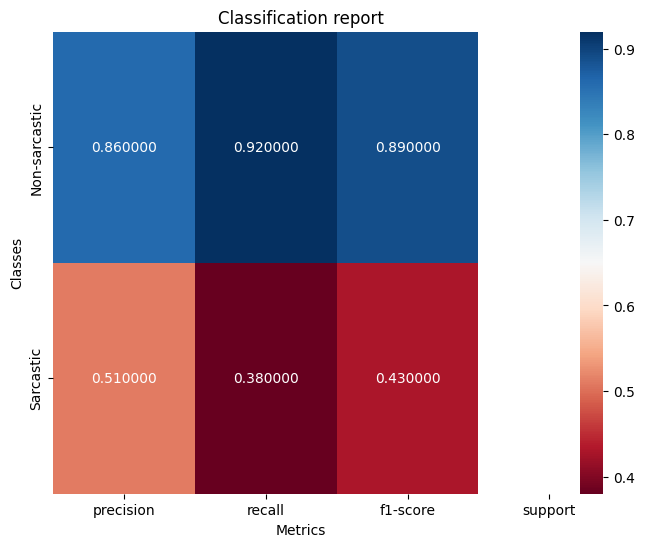

      ID                                               Text
0  Id_01  Shavakallarayile Kuzhimaadathile Peril Oru Let...
1  Id_02  ഗീതു മോഹൻദാസ് മലയാള സിനിമക്കു നൽകുന്ന വമ്പൻ ഗി...
2  Id_03                   Ente ponno ah sound🥰🥰 poli poli🤘
3  Id_04  Villain sharafudheen  ennu thonnunnavar likikk...
4  Id_05                 pulimurukan trailer ano kanunath 🤔
Index(['ID', 'Text'], dtype='object')
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
Results saved to /content/sarcasm_test_resultsCNN.csv


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Load the training data
file_path = '/content/sarcasm_mal_train.csv'
df = pd.read_csv(file_path)

# Display the first few rows and column names
print(df.head())
print(df.columns)

# Update the columns based on the actual names
df.columns = ['Text', 'Label']  # Adjust this line based on actual column names

# Encode labels
df['Label'] = df['Label'].map({'Non-sarcastic': 0, 'Sarcastic': 1})

# Split the data
X = df['Text'].values
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build the CNN Model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the Model
history = model.fit(X_train_pad, y_train_cat,
                    batch_size=32,
                    epochs=10,
                    validation_split=0.2)

# Evaluate the Model
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Generate Classification Report
report = classification_report(y_true, y_pred_classes, target_names=['Non-sarcastic', 'Sarcastic'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data
test_file_path = '/content/sarcasm_mal_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Display the first few rows and column names
print(test_df.head())
print(test_df.columns)

# Tokenize and pad sequences for test data
X_test_final_seq = tokenizer.texts_to_sequences(test_df['Text'].values)
X_test_final_pad = pad_sequences(X_test_final_seq, maxlen=max_len)

# Make predictions on the test data
y_test_final_pred = model.predict(X_test_final_pad)
y_test_final_pred_classes = np.argmax(y_test_final_pred, axis=1)

# Map predicted labels to original labels
label_map = {0: 'Non-sarcastic', 1: 'Sarcastic'}
test_df['labels'] = y_test_final_pred_classes
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/sarcasm_test_resultsCNN.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


MLP MODEL

                                                Text         labels
0           Screenshot edukkan vannth njan മാത്രമാണോ      Sarcastic
1  നമ്മുടെ അനു സിത്താര ചേച്ചി ഇങ്ങനെ വരുന്നത് നോക...      Sarcastic
2             Mollyhood is getting bigger and bigger  Non-sarcastic
3     Ho aaa BGM. Mammookka ithu oru pwoli pwolikkum  Non-sarcastic
4  Enthaale, sambhavam puraanam aanelum backgroun...      Sarcastic
Index(['Text', 'labels'], dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6936 - loss: 159.3556 - val_accuracy: 0.7806 - val_loss: 6.5921
Epoch 2/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6912 - loss: 14.0235 - val_accuracy: 0.6934 - val_loss: 1.4688
Epoch 3/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6968 - loss: 3.7508 - val_accuracy: 0.8033 - val_loss: 0.6256
Epoch 4/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7370 - loss: 1.4989 - val_accuracy: 0.8118 - val_loss: 0.5176
Epoch 5/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7851 - loss: 0.8837 - val_accuracy: 0.8104 - val_loss: 0.5232
Epoch 6/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7850 - loss: 0.8330 - val_accuracy: 0.8100 - val_loss: 0.4936
Epoch 7/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7911 - loss: 0.6808 - val_accuracy: 0.8114 - val_loss: 0.4842
Epoch 8/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7942 - loss: 0.6383 - val_accu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

Non-sarcastic       0.81      1.00      0.90      2142
    Sarcastic       0.00      0.00      0.00       496

     accuracy                           0.81      2638
    macro avg       0.41      0.50      0.45      2638
 weighted avg       0.66      0.81      0.73      2638



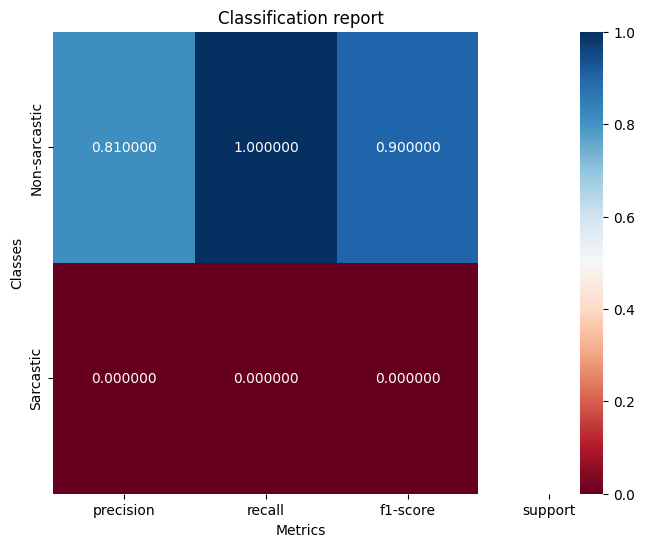

      ID                                               Text
0  Id_01  Shavakallarayile Kuzhimaadathile Peril Oru Let...
1  Id_02  ഗീതു മോഹൻദാസ് മലയാള സിനിമക്കു നൽകുന്ന വമ്പൻ ഗി...
2  Id_03                   Ente ponno ah sound🥰🥰 poli poli🤘
3  Id_04  Villain sharafudheen  ennu thonnunnavar likikk...
4  Id_05                 pulimurukan trailer ano kanunath 🤔
Index(['ID', 'Text'], dtype='object')
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Results saved to /content/sarcasm_test_resultsMLP.csv


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Load the training data
file_path = '/content/sarcasm_mal_train.csv'
df = pd.read_csv(file_path)

# Display the first few rows and column names
print(df.head())
print(df.columns)

# Update the columns based on the actual names
df.columns = ['Text', 'Label']  # Adjust this line based on actual column names

# Encode labels
df['Label'] = df['Label'].map({'Non-sarcastic': 0, 'Sarcastic': 1})

# Split the data
X = df['Text'].values
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build the MLP Model
model = Sequential()
model.add(Flatten(input_shape=(max_len,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the Model
history = model.fit(X_train_pad, y_train_cat,
                    batch_size=32,
                    epochs=10,
                    validation_split=0.2)

# Evaluate the Model
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Generate Classification Report
report = classification_report(y_true, y_pred_classes, target_names=['Non-sarcastic', 'Sarcastic'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data
test_file_path = '/content/sarcasm_mal_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Display the first few rows and column names
print(test_df.head())
print(test_df.columns)

# Tokenize and pad sequences for test data
X_test_final_seq = tokenizer.texts_to_sequences(test_df['Text'].values)
X_test_final_pad = pad_sequences(X_test_final_seq, maxlen=max_len)

# Make predictions on the test data
y_test_final_pred = model.predict(X_test_final_pad)
y_test_final_pred_classes = np.argmax(y_test_final_pred, axis=1)

# Map predicted labels to original labels
label_map = {0: 'Non-sarcastic', 1: 'Sarcastic'}
test_df['labels'] = y_test_final_pred_classes
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/sarcasm_test_resultsMLP.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


RNN MODEL

                                                Text         labels
0           Screenshot edukkan vannth njan മാത്രമാണോ      Sarcastic
1  നമ്മുടെ അനു സിത്താര ചേച്ചി ഇങ്ങനെ വരുന്നത് നോക...      Sarcastic
2             Mollyhood is getting bigger and bigger  Non-sarcastic
3     Ho aaa BGM. Mammookka ithu oru pwoli pwolikkum  Non-sarcastic
4  Enthaale, sambhavam puraanam aanelum backgroun...      Sarcastic
Index(['Text', 'labels'], dtype='object')
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


264/264 ━━━━━━━━━━━━━━━━━━━━ 79s 287ms/step - accuracy: 0.8060 - loss: 0.4889 - val_accuracy: 0.8578 - val_loss: 0.3544
Epoch 2/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 59s 200ms/step - accuracy: 0.9062 - loss: 0.2539 - val_accuracy: 0.8469 - val_loss: 0.3740
Epoch 3/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 84s 207ms/step - accuracy: 0.9468 - loss: 0.1498 - val_accuracy: 0.8237 - val_loss: 0.4851
Epoch 4/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 80s 201ms/step - accuracy: 0.9722 - loss: 0.0845 - val_accuracy: 0.8393 - val_loss: 0.5660
Epoch 5/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 84s 208ms/step - accuracy: 0.9855 - loss: 0.0449 - val_accuracy: 0.8332 - val_loss: 0.7105
Epoch 6/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 79s 196ms/step - accuracy: 0.9901 - loss: 0.0332 - val_accuracy: 0.8355 - val_loss: 0.9308
Epoch 7/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 55s 208ms/step - accuracy: 0.9915 - loss: 0.0239 - val_accuracy: 0.8128 - val_loss: 0.9601
Epoch 8/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 78s 193ms/step - accuracy: 0.9951 - loss: 0.0139 - val

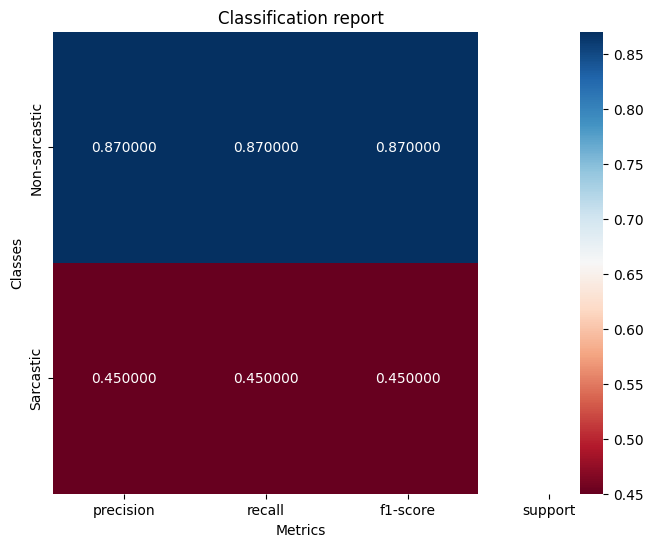

      ID                                               Text
0  Id_01  Shavakallarayile Kuzhimaadathile Peril Oru Let...
1  Id_02  ഗീതു മോഹൻദാസ് മലയാള സിനിമക്കു നൽകുന്ന വമ്പൻ ഗി...
2  Id_03                   Ente ponno ah sound🥰🥰 poli poli🤘
3  Id_04  Villain sharafudheen  ennu thonnunnavar likikk...
4  Id_05                 pulimurukan trailer ano kanunath 🤔
Index(['ID', 'Text'], dtype='object')
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step
Results saved to /content/sarcasm_test_resultsLSTM.csv


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training data
file_path = '/content/sarcasm_mal_train.csv'
df = pd.read_csv(file_path)

# Display the first few rows and column names
print(df.head())
print(df.columns)

# Update the columns based on the actual names
df.columns = ['Text', 'Label']  # Adjust this line based on actual column names

# Encode labels
df['Label'] = df['Label'].map({'Non-sarcastic': 0, 'Sarcastic': 1})

# Split the data
X = df['Text'].values
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build the LSTM Model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the Model
history = model.fit(X_train_pad, y_train_cat,
                    batch_size=32,
                    epochs=10,
                    validation_split=0.2)

# Evaluate the Model
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Generate Classification Report
report = classification_report(y_true, y_pred_classes, target_names=['Non-sarcastic', 'Sarcastic'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data
test_file_path = '/content/sarcasm_mal_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Display the first few rows and column names
print(test_df.head())
print(test_df.columns)

# Tokenize and pad sequences for test data
X_test_final_seq = tokenizer.texts_to_sequences(test_df['Text'].values)
X_test_final_pad = pad_sequences(X_test_final_seq, maxlen=max_len)

# Make predictions on the test data
y_test_final_pred = model.predict(X_test_final_pad)
y_test_final_pred_classes = np.argmax(y_test_final_pred, axis=1)

# Map predicted labels to original labels
label_map = {0: 'Non-sarcastic', 1: 'Sarcastic'}
test_df['labels'] = y_test_final_pred_classes
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/sarcasm_test_resultsLSTM.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


                                                Text         labels
0           Screenshot edukkan vannth njan മാത്രമാണോ      Sarcastic
1  നമ്മുടെ അനു സിത്താര ചേച്ചി ഇങ്ങനെ വരുന്നത് നോക...      Sarcastic
2             Mollyhood is getting bigger and bigger  Non-sarcastic
3     Ho aaa BGM. Mammookka ithu oru pwoli pwolikkum  Non-sarcastic
4  Enthaale, sambhavam puraanam aanelum backgroun...      Sarcastic
Index(['Text', 'labels'], dtype='object')
               precision    recall  f1-score   support

Non-sarcastic       0.84      0.98      0.90      2142
    Sarcastic       0.68      0.20      0.31       496

     accuracy                           0.83      2638
    macro avg       0.76      0.59      0.61      2638
 weighted avg       0.81      0.83      0.79      2638



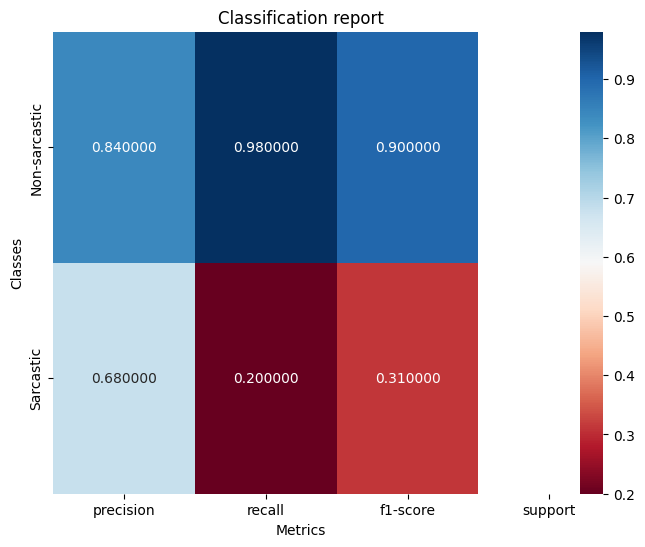

      ID                                               Text
0  Id_01  Shavakallarayile Kuzhimaadathile Peril Oru Let...
1  Id_02  ഗീതു മോഹൻദാസ് മലയാള സിനിമക്കു നൽകുന്ന വമ്പൻ ഗി...
2  Id_03                   Ente ponno ah sound🥰🥰 poli poli🤘
3  Id_04  Villain sharafudheen  ennu thonnunnavar likikk...
4  Id_05                 pulimurukan trailer ano kanunath 🤔
Index(['ID', 'Text'], dtype='object')
Results saved to /content/sarcasm_test_resultsLR.csv


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training data
file_path = '/content/sarcasm_mal_train.csv'
df = pd.read_csv(file_path)

# Display the first few rows and column names
print(df.head())
print(df.columns)

# Update the columns based on the actual names
df.columns = ['Text', 'Label']  # Adjust this line based on actual column names

# Encode labels
df['Label'] = df['Label'].map({'Non-sarcastic': 0, 'Sarcastic': 1})

# Split the data
X = df['Text'].values
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Build the Logistic Regression Model
model = LogisticRegression(max_iter=100, random_state=42)

# Train the Model
model.fit(X_train_tfidf, y_train)

# Evaluate the Model
y_pred = model.predict(X_test_tfidf)

# Generate Classification Report
report = classification_report(y_test, y_pred, target_names=['Non-sarcastic', 'Sarcastic'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data
test_file_path = '/content/sarcasm_mal_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Display the first few rows and column names
print(test_df.head())
print(test_df.columns)

# Vectorize the test data using the same TF-IDF vectorizer
X_test_final_tfidf = vectorizer.transform(test_df['Text'].values)

# Make predictions on the test data
y_test_final_pred = model.predict(X_test_final_tfidf)

# Map predicted labels to original labels
label_map = {0: 'Non-sarcastic', 1: 'Sarcastic'}
test_df['labels'] = y_test_final_pred
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/sarcasm_test_resultsLR.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


                                                Text         labels
0           Screenshot edukkan vannth njan മാത്രമാണോ      Sarcastic
1  നമ്മുടെ അനു സിത്താര ചേച്ചി ഇങ്ങനെ വരുന്നത് നോക...      Sarcastic
2             Mollyhood is getting bigger and bigger  Non-sarcastic
3     Ho aaa BGM. Mammookka ithu oru pwoli pwolikkum  Non-sarcastic
4  Enthaale, sambhavam puraanam aanelum backgroun...      Sarcastic
Index(['Text', 'labels'], dtype='object')
               precision    recall  f1-score   support

Non-sarcastic       0.82      0.99      0.90      2142
    Sarcastic       0.69      0.06      0.11       496

     accuracy                           0.82      2638
    macro avg       0.75      0.53      0.51      2638
 weighted avg       0.80      0.82      0.75      2638



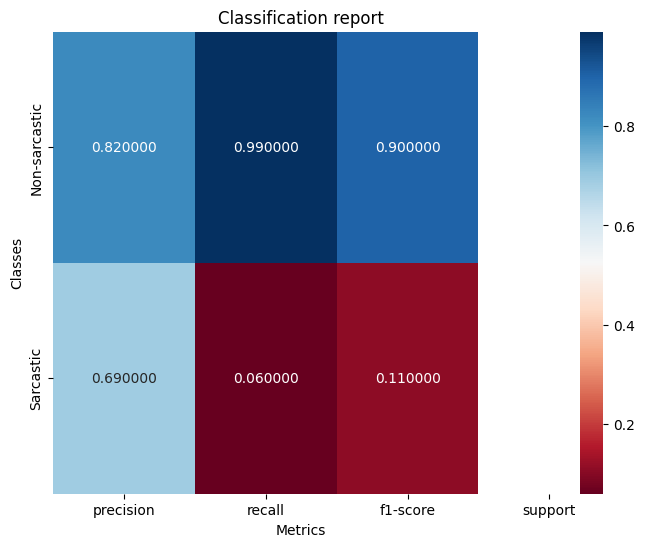

      ID                                               Text
0  Id_01  Shavakallarayile Kuzhimaadathile Peril Oru Let...
1  Id_02  ഗീതു മോഹൻദാസ് മലയാള സിനിമക്കു നൽകുന്ന വമ്പൻ ഗി...
2  Id_03                   Ente ponno ah sound🥰🥰 poli poli🤘
3  Id_04  Villain sharafudheen  ennu thonnunnavar likikk...
4  Id_05                 pulimurukan trailer ano kanunath 🤔
Index(['ID', 'Text'], dtype='object')
Results saved to /content/sarcasm_test_resultsKNN.csv


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training data
file_path = '/content/sarcasm_mal_train.csv'
df = pd.read_csv(file_path)

# Display the first few rows and column names
print(df.head())
print(df.columns)

# Update the columns based on the actual names
df.columns = ['Text', 'Label']  # Adjust this line based on actual column names

# Encode labels
df['Label'] = df['Label'].map({'Non-sarcastic': 0, 'Sarcastic': 1})

# Split the data
X = df['Text'].values
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Build the KNN Model
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# Train the Model
model.fit(X_train_tfidf, y_train)

# Evaluate the Model
y_pred = model.predict(X_test_tfidf)

# Generate Classification Report
report = classification_report(y_test, y_pred, target_names=['Non-sarcastic', 'Sarcastic'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data
test_file_path = '/content/sarcasm_mal_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Display the first few rows and column names
print(test_df.head())
print(test_df.columns)

# Vectorize the test data using the same TF-IDF vectorizer
X_test_final_tfidf = vectorizer.transform(test_df['Text'].values)

# Make predictions on the test data
y_test_final_pred = model.predict(X_test_final_tfidf)

# Map predicted labels to original labels
label_map = {0: 'Non-sarcastic', 1: 'Sarcastic'}
test_df['labels'] = y_test_final_pred
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/sarcasm_test_resultsKNN.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Load the training data
file_path = '/content/sarcasm_mal_train.csv'
df = pd.read_csv(file_path)

# Display the first few rows and column names
print(df.head())
print(df.columns)

# Update the columns based on the actual names
df.columns = ['Text', 'Label']
df['Label'] = df['Label'].map({'Non-sarcastic': 0, 'Sarcastic': 1})

# Split the data
X = df['Text'].values
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=1000)  # Adjust as needed
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

# Build and fit the GMM
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_train_pca)

# Predict clusters
y_train_pred = gmm.predict(X_train_pca)
y_test_pred = gmm.predict(X_test_pca)

# Map cluster labels to actual labels
# Assuming clusters map directly to labels (you may need to adjust this mapping)
cluster_label_map = {0: 0, 1: 1}  # Update this mapping as needed
y_train_mapped = np.array([cluster_label_map[label] for label in y_train_pred])
y_test_mapped = np.array([cluster_label_map[label] for label in y_test_pred])

# Generate Classification Report
report = classification_report(y_test, y_test_mapped, target_names=['Non-sarcastic', 'Sarcastic'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')
    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)
    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data
test_file_path = '/content/sarcasm_mal_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Display the first few rows and column names
print(test_df.head())
print(test_df.columns)

# Vectorize the test data using the same TF-IDF vectorizer
X_test_final_tfidf = vectorizer.transform(test_df['Text'].values)

# Apply PCA to reduce dimensionality for the test data
X_test_final_pca = pca.transform(X_test_final_tfidf.toarray())

# Predict clusters for the test data
y_test_final_pred = gmm.predict(X_test_final_pca)

# Map cluster labels to actual labels
test_df['labels'] = [cluster_label_map.get(label, 'Unknown') for label in y_test_final_pred]

# Save results to a CSV file
output_file_path = '/content/sarcasm_test_resultsGMM.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


ModuleNotFoundError: No module named 'keras.preprocessing.text'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 4.2 MB/s eta 0:00:00
                                                Text         labels
0           Screenshot edukkan vannth njan മാത്രമാണോ      Sarcastic
1  നമ്മുടെ അനു സിത്താര ചേച്ചി ഇങ്ങനെ വരുന്നത് നോക...      Sarcastic
2             Mollyhood is getting bigger and bigger  Non-sarcastic
3     Ho aaa BGM. Mammookka ithu oru pwoli pwolikkum  Non-sarcastic
4  Enthaale, sambhavam puraanam aanelum backgroun...      Sarcastic
Index(['Text', 'labels'], dtype='object')


               precision    recall  f1-score   support

Non-sarcastic       0.82      0.97      0.89      2142
    Sarcastic       0.43      0.11      0.18       496

     accuracy                           0.81      2638
    macro avg       0.63      0.54      0.53      2638
 weighted avg       0.75      0.81      0.76      2638



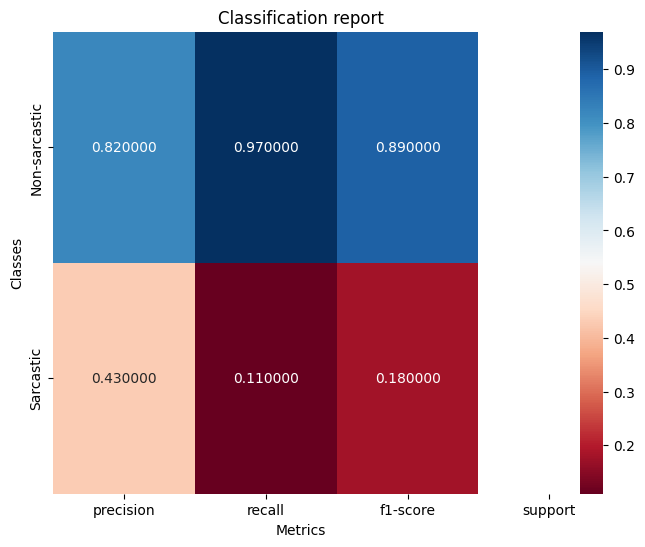

      ID                                               Text
0  Id_01  Shavakallarayile Kuzhimaadathile Peril Oru Let...
1  Id_02  ഗീതു മോഹൻദാസ് മലയാള സിനിമക്കു നൽകുന്ന വമ്പൻ ഗി...
2  Id_03                   Ente ponno ah sound🥰🥰 poli poli🤘
3  Id_04  Villain sharafudheen  ennu thonnunnavar likikk...
4  Id_05                 pulimurukan trailer ano kanunath 🤔
Index(['ID', 'Text'], dtype='object')
Results saved to /content/sarcasm_test_resultsHMM.csv


In [ ]:
!pip install hmmlearn

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Install hmmlearn if not already installed
!pip install hmmlearn

# Load the training data
file_path = '/content/sarcasm_mal_train.csv'
df = pd.read_csv(file_path)

# Display the first few rows and column names
print(df.head())
print(df.columns)

# Update the columns based on the actual names
df.columns = ['Text', 'Label']  # Adjust this line based on actual column names

# Encode labels
df['Label'] = df['Label'].map({'Non-sarcastic': 0, 'Sarcastic': 1})

# Split the data
X = df['Text'].values
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to feature vectors
vectorizer = CountVectorizer(max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

# Fit HMM model for each class
models = {}
for label in np.unique(y_train):
    model = GaussianHMM(n_components=2, covariance_type='diag', n_iter=100)
    # Fit the model on the data for this class
    X_train_class_vec = X_train_vec[y_train == label]
    model.fit(X_train_class_vec)
    models[label] = model

# Predict on the test data
def predict_hmm(models, X_test_vec):
    scores = np.zeros((X_test_vec.shape[0], len(models)))
    for label, model in models.items():
        for i in range(X_test_vec.shape[0]):
            scores[i, label] = model.score(X_test_vec[i].reshape(1, -1))
    return np.argmax(scores, axis=1)

y_pred = predict_hmm(models, X_test_vec)

# Generate Classification Report
report = classification_report(y_test, y_pred, target_names=['Non-sarcastic', 'Sarcastic'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data
test_file_path = '/content/sarcasm_mal_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Display the first few rows and column names
print(test_df.head())
print(test_df.columns)

# Convert test data to feature vectors
X_test_final_vec = vectorizer.transform(test_df['Text'].values).toarray()

# Make predictions on the test data
y_test_final_pred = predict_hmm(models, X_test_final_vec)

# Map predicted labels to original labels
label_map = {0: 'Non-sarcastic', 1: 'Sarcastic'}
test_df['labels'] = y_test_final_pred
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/sarcasm_test_resultsHMM.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


RANDOM FOREST MODEL

                                                Text         labels
0           Screenshot edukkan vannth njan മാത്രമാണോ      Sarcastic
1  നമ്മുടെ അനു സിത്താര ചേച്ചി ഇങ്ങനെ വരുന്നത് നോക...      Sarcastic
2             Mollyhood is getting bigger and bigger  Non-sarcastic
3     Ho aaa BGM. Mammookka ithu oru pwoli pwolikkum  Non-sarcastic
4  Enthaale, sambhavam puraanam aanelum backgroun...      Sarcastic
Index(['Text', 'labels'], dtype='object')
               precision    recall  f1-score   support

Non-sarcastic       0.84      0.98      0.90      2142
    Sarcastic       0.66      0.17      0.27       496

     accuracy                           0.83      2638
    macro avg       0.75      0.57      0.59      2638
 weighted avg       0.80      0.83      0.78      2638



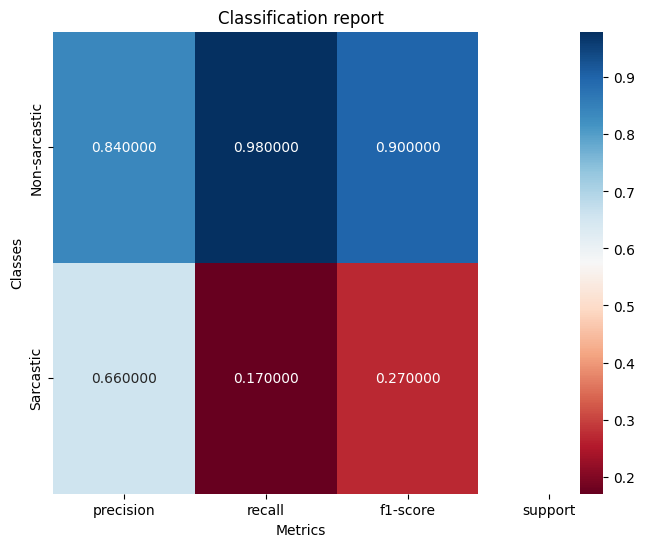

      ID                                               Text
0  Id_01  Shavakallarayile Kuzhimaadathile Peril Oru Let...
1  Id_02  ഗീതു മോഹൻദാസ് മലയാള സിനിമക്കു നൽകുന്ന വമ്പൻ ഗി...
2  Id_03                   Ente ponno ah sound🥰🥰 poli poli🤘
3  Id_04  Villain sharafudheen  ennu thonnunnavar likikk...
4  Id_05                 pulimurukan trailer ano kanunath 🤔
Index(['ID', 'Text'], dtype='object')
Results saved to /content/sarcasm_test_resultsRF.csv


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training data
file_path = '/content/sarcasm_mal_train.csv'
df = pd.read_csv(file_path)

# Display the first few rows and column names
print(df.head())
print(df.columns)

# Update the columns based on the actual names
df.columns = ['Text', 'Label']  # Adjust this line based on actual column names

# Encode labels
df['Label'] = df['Label'].map({'Non-sarcastic': 0, 'Sarcastic': 1})

# Split the data
X = df['Text'].values
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Build the Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Model
model.fit(X_train_tfidf, y_train)

# Evaluate the Model
y_pred = model.predict(X_test_tfidf)

# Generate Classification Report
report = classification_report(y_test, y_pred, target_names=['Non-sarcastic', 'Sarcastic'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data
test_file_path = '/content/sarcasm_mal_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Display the first few rows and column names
print(test_df.head())
print(test_df.columns)

# Vectorize the test data using the same TF-IDF vectorizer
X_test_final_tfidf = vectorizer.transform(test_df['Text'].values)

# Make predictions on the test data
y_test_final_pred = model.predict(X_test_final_tfidf)

# Map predicted labels to original labels
label_map = {0: 'Non-sarcastic', 1: 'Sarcastic'}
test_df['labels'] = y_test_final_pred
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/sarcasm_test_resultsRF.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')


GRU MODEL

                                                Text         labels
0           Screenshot edukkan vannth njan മാത്രമാണോ      Sarcastic
1  നമ്മുടെ അനു സിത്താര ചേച്ചി ഇങ്ങനെ വരുന്നത് നോക...      Sarcastic
2             Mollyhood is getting bigger and bigger  Non-sarcastic
3     Ho aaa BGM. Mammookka ithu oru pwoli pwolikkum  Non-sarcastic
4  Enthaale, sambhavam puraanam aanelum backgroun...      Sarcastic
Index(['Text', 'labels'], dtype='object')
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


264/264 ━━━━━━━━━━━━━━━━━━━━ 64s 219ms/step - accuracy: 0.8069 - loss: 0.4838 - val_accuracy: 0.8564 - val_loss: 0.3643
Epoch 2/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 97s 273ms/step - accuracy: 0.9011 - loss: 0.2492 - val_accuracy: 0.8403 - val_loss: 0.3843
Epoch 3/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 67s 217ms/step - accuracy: 0.9528 - loss: 0.1351 - val_accuracy: 0.8270 - val_loss: 0.4551
Epoch 4/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 87s 330ms/step - accuracy: 0.9748 - loss: 0.0821 - val_accuracy: 0.8251 - val_loss: 0.5800
Epoch 5/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 106s 193ms/step - accuracy: 0.9826 - loss: 0.0550 - val_accuracy: 0.8090 - val_loss: 0.6538
Epoch 6/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 82s 195ms/step - accuracy: 0.9859 - loss: 0.0509 - val_accuracy: 0.8284 - val_loss: 0.7236
Epoch 7/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 52s 196ms/step - accuracy: 0.9917 - loss: 0.0270 - val_accuracy: 0.8128 - val_loss: 0.8698
Epoch 8/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 80s 191ms/step - accuracy: 0.9938 - loss: 0.0156 - va

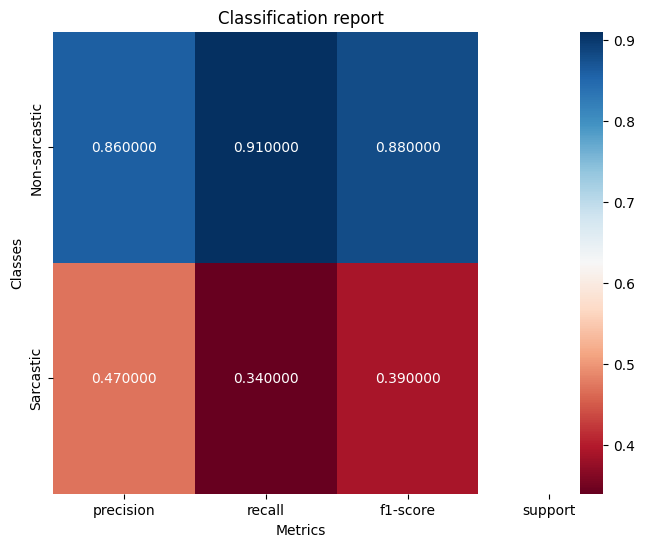

      ID                                               Text
0  Id_01  Shavakallarayile Kuzhimaadathile Peril Oru Let...
1  Id_02  ഗീതു മോഹൻദാസ് മലയാള സിനിമക്കു നൽകുന്ന വമ്പൻ ഗി...
2  Id_03                   Ente ponno ah sound🥰🥰 poli poli🤘
3  Id_04  Villain sharafudheen  ennu thonnunnavar likikk...
4  Id_05                 pulimurukan trailer ano kanunath 🤔
Index(['ID', 'Text'], dtype='object')
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step
Results saved to /content/sarcasm_test_resultsGRU.csv


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Load the training data
file_path = '/content/sarcasm_mal_train.csv'
df = pd.read_csv(file_path)

# Display the first few rows and column names
print(df.head())
print(df.columns)

# Update the columns based on the actual names
df.columns = ['Text', 'Label']  # Adjust this line based on actual column names

# Encode labels
df['Label'] = df['Label'].map({'Non-sarcastic': 0, 'Sarcastic': 1})

# Split the data
X = df['Text'].values
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build the GRU Model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the Model
history = model.fit(X_train_pad, y_train_cat,
                    batch_size=32,
                    epochs=10,
                    validation_split=0.2)

# Evaluate the Model
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Generate Classification Report
report = classification_report(y_true, y_pred_classes, target_names=['Non-sarcastic', 'Sarcastic'])
print(report)

# Function to Visualize the Classification Report
def plot_classification_report(report, title='Classification report', cmap='RdBu'):
    lines = report.split('\n')

    classes = []
    plotMat = []
    for line in lines[2: (len(lines) - 3)]:
        t = line.split()
        if len(t) < 5:
            continue  # Skip lines that don't have the expected number of elements
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, fmt="f", cmap=cmap, xticklabels=['precision', 'recall', 'f1-score', 'support'], yticklabels=classes)
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

plot_classification_report(report)

# Load the test data
test_file_path = '/content/sarcasm_mal_test_without_labels.csv'
test_df = pd.read_csv(test_file_path)

# Display the first few rows and column names
print(test_df.head())
print(test_df.columns)

# Tokenize and pad sequences for test data
X_test_final_seq = tokenizer.texts_to_sequences(test_df['Text'].values)
X_test_final_pad = pad_sequences(X_test_final_seq, maxlen=max_len)

# Make predictions on the test data
y_test_final_pred = model.predict(X_test_final_pad)
y_test_final_pred_classes = np.argmax(y_test_final_pred, axis=1)

# Map predicted labels to original labels
label_map = {0: 'Non-sarcastic', 1: 'Sarcastic'}
test_df['labels'] = y_test_final_pred_classes
test_df['labels'] = test_df['labels'].map(label_map)

# Save results to a CSV file
output_file_path = '/content/sarcasm_test_resultsGRU.csv'
test_df.to_csv(output_file_path, index=False)

print(f'Results saved to {output_file_path}')
